In [1]:
# load model 'faster_rcnn_model.pth'

import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# load model
num_classes = 3
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(num_classes=num_classes, pretrained=False)
model.load_state_dict(torch.load('faster_rcnn_model2.pth', map_location=torch.device('cpu')))
model.eval()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [13]:
# load image
img_path = 'received_image.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.0
img = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1)
img = img.unsqueeze(0)

# inference
with torch.no_grad():
    prediction = model(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


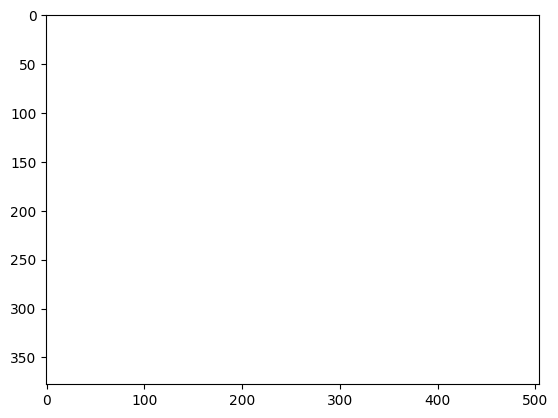

In [14]:
N_BOXES = 1

# draw bounding box
fig, ax = plt.subplots(1)
ax.imshow(img[0].permute(1, 2, 0))
for box in prediction[0]['boxes'][:N_BOXES]:
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

In [4]:
import numpy as np
# save image
fig.savefig('result.jpg')
# print the class
print(prediction[0]['labels'])
label = prediction[0]['labels']
# print the corresponding score
print(prediction[0]['scores'])
# print the name of the class
json_file = 'dataset/coco_train.json'
import json
with open(json_file) as f:
    data = json.load(f)

# get the most probable class
max_score_index = np.argmax(prediction[0]['scores'])
max_score = prediction[0]['scores'][max_score_index]

name = ''
for category in data['categories']:
    if category['id'] == label[max_score_index]:
        name = category['name']
        break
print(name)

tensor([2, 2, 2, 1, 1])
tensor([0.9705, 0.7490, 0.0782, 0.0723, 0.0654])
eggs
